In [1]:
from __future__ import division, print_function
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import comptools as comp

%matplotlib inline

In [2]:
sns.set_context(context='paper', font_scale=1.5)

In [3]:
data_dir = os.path.join(comp.paths.comp_data_dir,
                        'IC86.2012',
                        'data')
data_dir

'/data/user/jbourbeau/composition/IC86.2012/data'

In [4]:
filepath_nomial = os.path.join(data_dir, 
                               'data_dataframe_quality_cuts.hdf')
df_nominal = pd.read_hdf(filepath_nomial,
                         columns=['log_s125', 'reco_log_energy'])

In [5]:
df_nominal.head()

,log_s125,reco_log_energy
0,0.261196,6.279144
1,0.244737,6.334337
2,0.505508,6.523364
3,0.135388,6.258651
4,0.206452,6.361936


In [6]:
filepath_up_shift = os.path.join(data_dir, 
                                'data_dataframe_vem_cal_up.hdf')
df_up_shift = pd.read_hdf(filepath_up_shift,
                          columns=['log_s125', 'reco_log_energy'])

In [7]:
df_up_shift.head()

,log_s125,reco_log_energy
0,0.274034,6.289964
1,0.257574,6.344042
2,0.518345,6.533759
3,0.148226,6.268040
4,0.219289,6.370988


In [8]:
filepath_down_shift = os.path.join(data_dir, 
                                   'data_dataframe_vem_cal_down.hdf')
df_down_shift = pd.read_hdf(filepath_down_shift,
                            columns=['log_s125', 'reco_log_energy'])

In [9]:
df_down_shift.head()

,log_s125,reco_log_energy
0,0.247968,6.268035
1,0.231508,6.324377
2,0.492280,6.512692
3,0.122160,6.249016
4,0.193223,6.352650


In [10]:
energybins = comp.get_energybins()
energybins.log_energy_bins

array([6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3,
       7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ])

/home/jbourbeau/cr-composition/.virtualenv/lib/python2.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


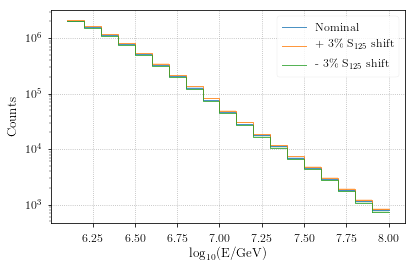

In [11]:
fig, ax = plt.subplots()

labels = ['Nominal', '+ 3\% $\mathrm{S_{125}}$ shift', '- 3\% $\mathrm{S_{125}}$ shift']
dfs = [df_nominal, df_up_shift, df_down_shift]
colors = ['C{}'.format(i) for i in range(len(labels))]
for label, df, color in zip(labels, dfs, colors):
    counts, _ = np.histogram(df['reco_log_energy'], bins=energybins.log_energy_bins)
    counts_err = np.sqrt(counts)
    scaling = 1
#     scaling = energybins.energy_midpoints ** 2.7 / energybins.energy_bin_widths
    comp.plot_steps(energybins.log_energy_bins, scaling * counts, yerr=scaling * counts_err,
                    label=label, color=color, alpha=0.8, ax=ax)

ax.set(ylabel='Counts',
       xlabel='$\mathrm{\\log_{10}(E/GeV)}$',
       yscale='log',
      )
ax.grid()
ax.legend()

outfile = os.path.join(comp.paths.figures_dir,
                       'systematics',
                       'vem_cal_energy_hist.png')
comp.check_output_dir(outfile)
plt.savefig(outfile)

plt.show()

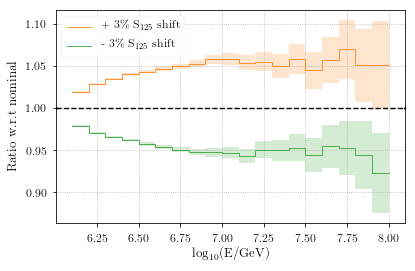

In [18]:
fig, ax = plt.subplots()

counts_nom, _ = np.histogram(df_nominal['reco_log_energy'], bins=energybins.log_energy_bins)
counts_nom_err = np.sqrt(counts_nom)

labels = ['+ 3\% $\mathrm{S_{125}}$ shift', '- 3\% $\mathrm{S_{125}}$ shift']
dfs = [df_up_shift, df_down_shift]
colors = ['C{}'.format(i + 1) for i in range(len(labels))]
for label, df, color in zip(labels, dfs, colors):
    counts, _ = np.histogram(df['reco_log_energy'], bins=energybins.log_energy_bins)
    counts_err = np.sqrt(counts)
    ratio, ratio_err = comp.ratio_error(num=counts,
                                        num_err=counts_err,
                                        den=counts_nom,
                                        den_err=counts_nom_err)
    comp.plot_steps(energybins.log_energy_bins, ratio, yerr=ratio_err,
                    label=label, color=color, alpha=0.8, ax=ax)

ax.axhline(1, ls='--', color='k')
ax.set(ylabel='Ratio w.r.t nominal',
       xlabel='$\mathrm{\\log_{10}(E/GeV)}$',
      )
ax.grid()
ax.legend()

outfile = os.path.join(comp.paths.figures_dir,
                       'systematics',
                       'vem_cal_energy_ratio.png')
comp.check_output_dir(outfile)
plt.savefig(outfile)

plt.show()